In [1]:
# --- 1. Conectar a Google Drive ---
# Aparecerá una ventana para que autorices el acceso a tus archivos.
from google.colab import drive
drive.mount('/content/drive')
print("\n✅ Google Drive conectado exitosamente.")

Mounted at /content/drive

✅ Google Drive conectado exitosamente.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import os

# --- 1. Carga de csv a procesar en los gráficos ---
DRIVE_PROJECT_PATH = '/content/drive/MyDrive/TFM_Cienciometria'
TMP_DIR = os.path.join(DRIVE_PROJECT_PATH, 'data')
TMP_IMG = os.path.join(DRIVE_PROJECT_PATH, 'data/imagenes')
ruta_mathbert = os.path.join(DRIVE_PROJECT_PATH, 'data/mathbert/tmp/05_ki_semantic_mathbert_TODO_win5.csv')
ruta_word2vec = os.path.join(DRIVE_PROJECT_PATH, 'data/word2vec/tmp/05_ki_semantic_word2vec_TODO_win5.csv')

📦 Cargando archivos CSV con los resultados...
✅ Archivos cargados exitosamente.

📊 Generando Gráfico 1: Histograma con rango completo...
✅ Gráfico con zoom guardado en: /content/drive/MyDrive/TFM_Cienciometria/data/imagenes/06_histograma_ki_score.png


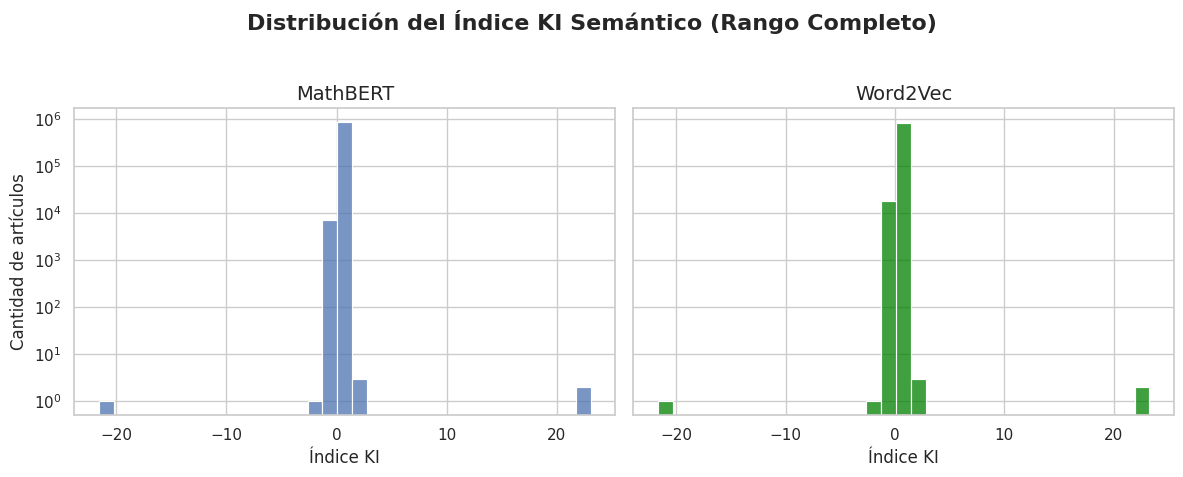

In [3]:
# Establece un tema estético para los gráficos
sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

# --- 1. Carga de los Datos ---
# (Se asume que esta parte ya se ejecutó y los DataFrames df_mathbert y df_word2vec están cargados)
print("📦 Cargando archivos CSV con los resultados...")
try:
    df_mathbert = pd.read_csv(ruta_mathbert)
    df_word2vec = pd.read_csv(ruta_word2vec)
    print("✅ Archivos cargados exitosamente.")
except FileNotFoundError as e:
    print(f"❌ Error: No se pudo encontrar el archivo. Revisa la ruta: {e.filename}")

# --- 2. GRÁFICO 1: Histograma con RANGO COMPLETO (Útil para ver las colas) ---
print("\n📊 Generando Gráfico 1: Histograma con rango completo...")

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle('Distribución del Índice KI Semántico (Rango Completo)', fontsize=16, weight='bold')

# Histograma para MathBERT
sns.histplot(df_mathbert['ki_score'], bins=33, ax=axes[0], kde=False) # kde=False para un conteo limpio
axes[0].set_title('MathBERT', fontsize=14)
axes[0].set_xlabel('Índice KI', fontsize=12)
axes[0].set_ylabel('Cantidad de artículos', fontsize=12)
axes[0].set_yscale('log')

# Histograma para Word2Vec
sns.histplot(df_word2vec['ki_score'], bins=33, ax=axes[1], kde=False, color='green')
axes[1].set_title('Word2Vec', fontsize=14)
axes[1].set_xlabel('Índice KI', fontsize=12)
axes[1].set_ylabel('')
axes[1].set_yscale('log')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Guardar la figura
ruta_guardado_zoom = os.path.join(TMP_IMG, '06_histograma_ki_score.png')
plt.savefig(ruta_guardado_zoom, dpi=300, bbox_inches='tight')
print(f"✅ Gráfico con zoom guardado en: {ruta_guardado_zoom}")
plt.show()


📊 Generando Gráfico 2: Histograma enfocado en el pico central...
✅ Gráfico con zoom y barras separadas guardado en: /content/drive/MyDrive/TFM_Cienciometria/data/imagenes/06_histograma_ki_score_zoom_separado.png


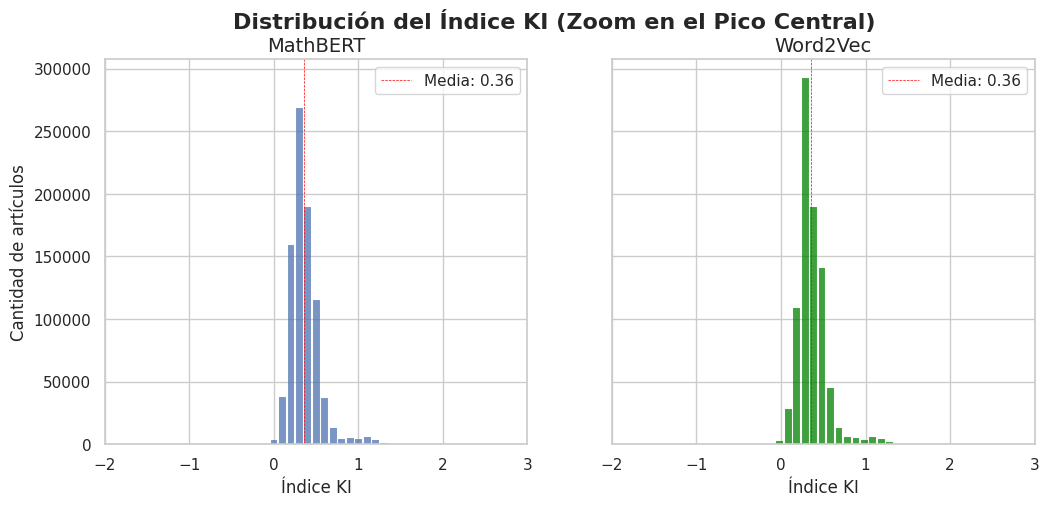

In [4]:
# --- 3. GRÁFICO 2: Histograma con "ZOOM-IN" y Barras Separadas ---
print("\n📊 Generando Gráfico 2: Histograma enfocado en el pico central...")

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle('Distribución del Índice KI (Zoom en el Pico Central)', fontsize=16, weight='bold')

# --- Rango de "Zoom" para el eje X ---
x_limite_inferior = -2
x_limite_superior = 3

# --- ¡NUEVO! Parámetros para controlar el aspecto de las barras ---
ancho_del_bin = 0.1  # Define un ancho fijo para cada barra
factor_encogimiento = 0.8 # Encoge las barras al 80% de su ancho para crear espacio

# Histograma para MathBERT (enfocado y con barras separadas)
sns.histplot(df_mathbert['ki_score'],
             binwidth=ancho_del_bin,    # Usa ancho de bin en lugar de número de bines
             shrink=factor_encogimiento, # Encoge las barras para separarlas
             ax=axes[0],
             kde=False)

mean_mb = df_mathbert['ki_score'].mean()
axes[0].axvline(mean_mb, color='red', linestyle='--', linewidth=0.5, label=f'Media: {mean_mb:.2f}')
axes[0].set_title('MathBERT', fontsize=14)
axes[0].set_xlabel('Índice KI', fontsize=12)
axes[0].set_ylabel('Cantidad de artículos', fontsize=12)
axes[0].set_xlim(x_limite_inferior, x_limite_superior)
axes[0].legend()

# Histograma para Word2Vec (enfocado y con barras separadas)
sns.histplot(df_word2vec['ki_score'],
             binwidth=ancho_del_bin,
             shrink=factor_encogimiento,
             ax=axes[1],
             kde=False,
             color='green')

mean_w2v = df_word2vec['ki_score'].mean()
axes[1].axvline(mean_w2v, color='red', linestyle='--', linewidth=0.5, label=f'Media: {mean_w2v:.2f}')
axes[1].set_title('Word2Vec', fontsize=14)
axes[1].set_xlabel('Índice KI', fontsize=12)
axes[1].set_ylabel('')
axes[1].set_xlim(x_limite_inferior, x_limite_superior)
axes[1].legend()

# Guardar la figura del zoom
ruta_guardado_zoom = os.path.join(TMP_IMG, '06_histograma_ki_score_zoom_separado.png')
plt.savefig(ruta_guardado_zoom, dpi=300, bbox_inches='tight')
print(f"✅ Gráfico con zoom y barras separadas guardado en: {ruta_guardado_zoom}")
plt.show()


📈 Generando Gráfico 2: Evolución temporal del ki_score promedio...
✅ Gráfico guardado en: /content/drive/MyDrive/TFM_Cienciometria/data/imagenes/06_evolucion_temporal_ki_con_conteo.png


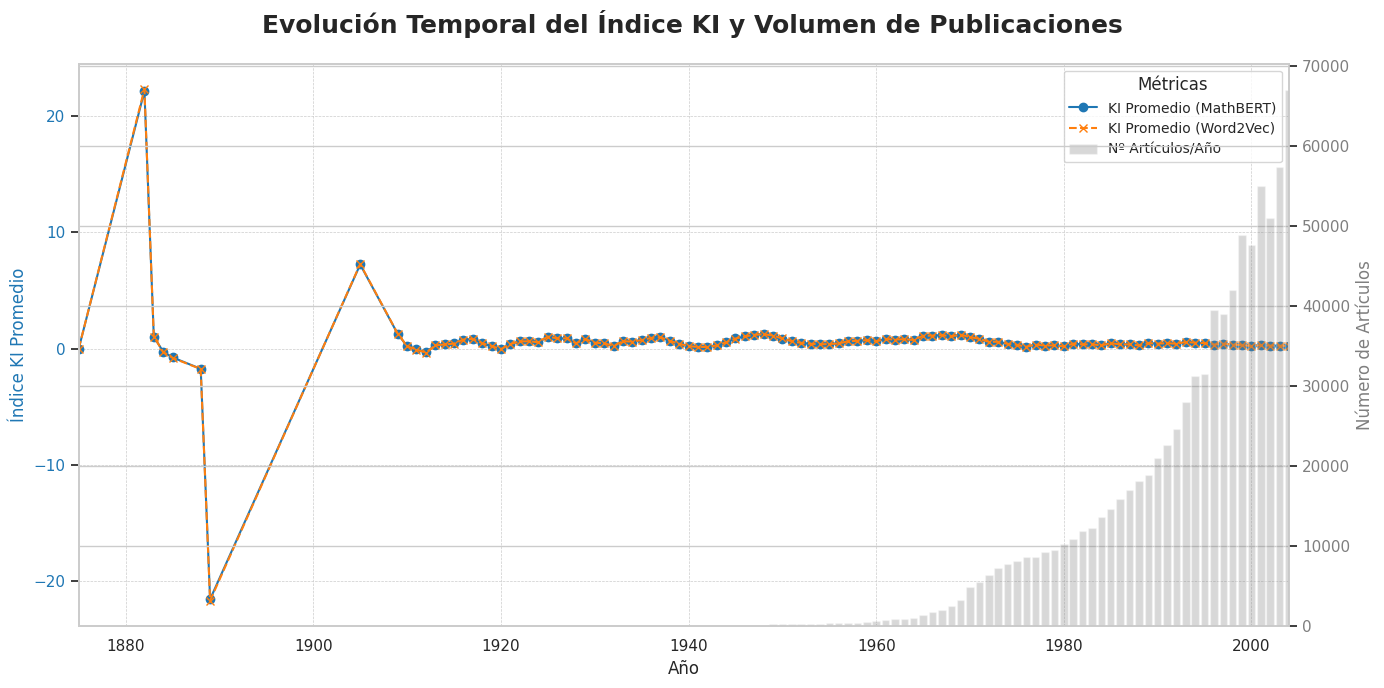

In [6]:
# --- 3. GRÁFICO 2: Evolución Temporal del Índice KI Promedio ---
print("\n📈 Generando Gráfico 2: Evolución temporal del ki_score promedio...")

# Preparar datos (convertir a datetime y extraer año)
df_mathbert['year'] = pd.to_datetime(df_mathbert['cover_date']).dt.year
df_word2vec['year'] = pd.to_datetime(df_word2vec['cover_date']).dt.year

# Calcular promedios anuales
ki_avg_mathbert = df_mathbert.groupby('year')['ki_score'].mean()
ki_avg_word2vec = df_word2vec.groupby('year')['ki_score'].mean()

# --- ¡NUEVO! Calcular el conteo de artículos por año ---
# Usamos df_mathbert, ya que el conteo de artículos por año es el mismo para ambos modelos.
counts_per_year = df_mathbert.groupby('year')['eid'].count()

# --- MODIFICADO: Configuración del gráfico con dos ejes ---
fig, ax1 = plt.subplots(figsize=(14, 7))

# Título y etiquetas del eje X principal
fig.suptitle('Evolución Temporal del Índice KI y Volumen de Publicaciones', fontsize=18, weight='bold')
ax1.set_xlabel('Año', fontsize=12)

# --- Eje Y izquierdo (ax1) para el Índice KI ---
color_mb = 'tab:blue'
ax1.set_ylabel('Índice KI Promedio', fontsize=12, color=color_mb)
ax1.plot(ki_avg_mathbert.index, ki_avg_mathbert.values, label='KI Promedio (MathBERT)', marker='o', linestyle='-', color=color_mb)
ax1.plot(ki_avg_word2vec.index, ki_avg_word2vec.values, label='KI Promedio (Word2Vec)', marker='x', linestyle='--', color='tab:orange')
ax1.tick_params(axis='y', labelcolor=color_mb)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# --- ¡NUEVO! Crear el segundo eje Y (ax2) para el conteo de artículos ---
ax2 = ax1.twinx()
color_count = 'tab:gray'
ax2.set_ylabel('Número de Artículos', fontsize=12, color=color_count)
# Usamos un gráfico de barras para el conteo para diferenciarlo visualmente
ax2.bar(counts_per_year.index, counts_per_year.values, label='Nº Artículos/Año', color=color_count, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color_count)

# --- ¡NUEVO! Leyenda combinada para ambos ejes ---
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper right', title='Métricas', fontsize=10)

# Ajustar límites del eje X
plt.xlim(ki_avg_mathbert.index.min(), ki_avg_mathbert.index.max())
fig.tight_layout() # Ajusta el layout para que no se superpongan las etiquetas

# Guardar la figura
ruta_guardado_temporal = os.path.join(TMP_IMG, '06_evolucion_temporal_ki_con_conteo.png')
plt.savefig(ruta_guardado_temporal, dpi=300, bbox_inches='tight')
print(f"✅ Gráfico guardado en: {ruta_guardado_temporal}")
plt.show()


🔗 Generando Gráfico 3: Correlación de ki_score vs. citedby_count...

--- Correlaciones Numéricas ---
MathBERT -> Pearson: 0.0119, Spearman: 0.0508
Word2Vec -> Pearson: 0.0118, Spearman: 0.0491

✅ Gráfico corregido guardado en: /content/drive/MyDrive/TFM_Cienciometria/data/imagenes/06_correlacion_ki_citas_con_etiquetas.png


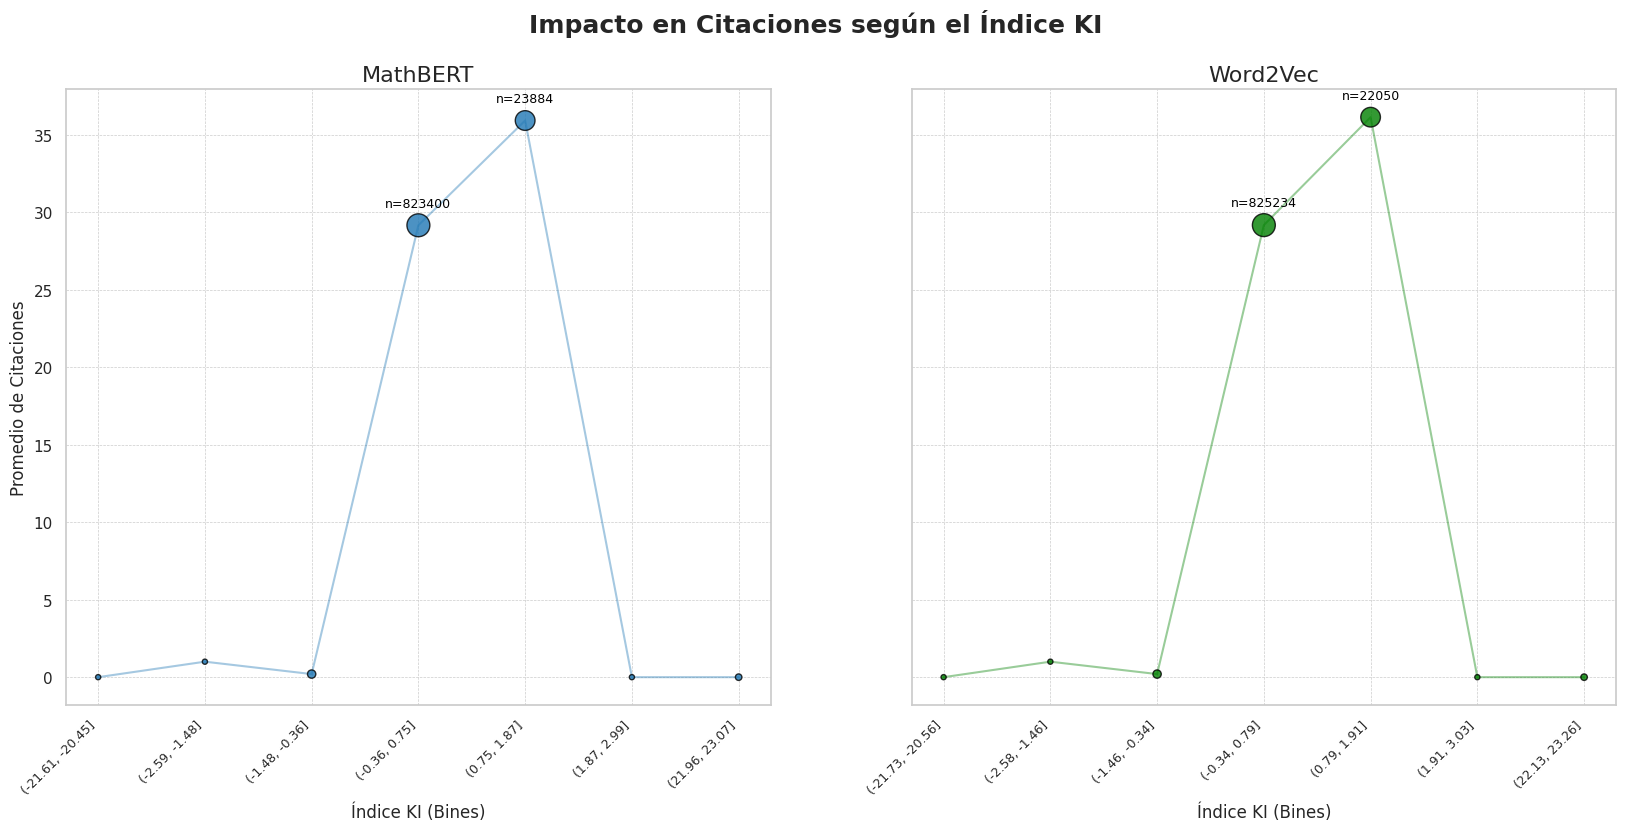

In [7]:
# --- 4. GRÁFICO 3: Correlación entre Índice KI y Citaciones ---
print("\n🔗 Generando Gráfico 3: Correlación de ki_score vs. citedby_count...")

# Correlaciones numéricas (sin cambios)
corr_mathbert_p = df_mathbert[['ki_score', 'citedby_count']].corr(method='pearson').iloc[0, 1]
corr_word2vec_p = df_word2vec[['ki_score', 'citedby_count']].corr(method='pearson').iloc[0, 1]
corr_mathbert_s = df_mathbert[['ki_score', 'citedby_count']].corr(method='spearman').iloc[0, 1]
corr_word2vec_s = df_word2vec[['ki_score', 'citedby_count']].corr(method='spearman').iloc[0, 1]
print(f"\n--- Correlaciones Numéricas ---")
print(f"MathBERT -> Pearson: {corr_mathbert_p:.4f}, Spearman: {corr_mathbert_s:.4f}")
print(f"Word2Vec -> Pearson: {corr_word2vec_p:.4f}, Spearman: {corr_word2vec_s:.4f}")

# Preparación de datos (sin cambios)
df_mathbert['ki_bin'] = pd.cut(df_mathbert['ki_score'], bins=40, duplicates='drop')
binned_citations_mb = df_mathbert.groupby('ki_bin', observed=True)['citedby_count'].mean()
binned_counts_mb = df_mathbert.groupby('ki_bin', observed=True)['eid'].count()
x_labels_mb = [f"({b.left:.2f}, {b.right:.2f}]" for b in binned_citations_mb.index]

df_word2vec['ki_bin'] = pd.cut(df_word2vec['ki_score'], bins=40, duplicates='drop')
binned_citations_w2v = df_word2vec.groupby('ki_bin', observed=True)['citedby_count'].mean()
binned_counts_w2v = df_word2vec.groupby('ki_bin', observed=True)['eid'].count()
x_labels_w2v = [f"({b.left:.2f}, {b.right:.2f}]" for b in binned_citations_w2v.index]

# Graficar
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True) # Aumenté un poco el tamaño para dar espacio a las etiquetas
fig.suptitle('Impacto en Citaciones según el Índice KI', fontsize=18, weight='bold')

# --- Gráfico para MathBERT ---
sizes_mb = np.log1p(binned_counts_mb.values) * 20
axes[0].plot(range(len(binned_citations_mb)), binned_citations_mb.values, color='tab:blue', alpha=0.4, zorder=1)
axes[0].scatter(range(len(binned_citations_mb)), binned_citations_mb.values,
                s=sizes_mb, label='Promedio de Citaciones', color='tab:blue', edgecolors='black', alpha=0.8, zorder=2)

# --- ¡NUEVO! BUCLE PARA AÑADIR ETIQUETAS DE CONTEO ---
for i, count in enumerate(binned_counts_mb):
    # Solo mostrar etiquetas para bines con un número significativo de artículos para no saturar
    if count > 1000:
        axes[0].text(i, binned_citations_mb.values[i] + 1, f'n={count}', # el '+1' es un pequeño offset vertical
                     ha='center', va='bottom', fontsize=9, color='black')

axes[0].set_title('MathBERT', fontsize=16)
axes[0].set_xlabel('Índice KI (Bines)', fontsize=12)
axes[0].set_ylabel('Promedio de Citaciones', fontsize=12)

# Ajustado para que las etiquetas del eje X sean legibles
tick_spacing = 1
axes[0].set_xticks(range(0, len(x_labels_mb), tick_spacing))
axes[0].set_xticklabels([x_labels_mb[i] for i in range(0, len(x_labels_mb), tick_spacing)], rotation=45, ha='right', fontsize=9)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)


# --- Gráfico para Word2Vec ---
sizes_w2v = np.log1p(binned_counts_w2v.values) * 20
axes[1].plot(range(len(binned_citations_w2v)), binned_citations_w2v.values, color='green', alpha=0.4, zorder=1)
axes[1].scatter(range(len(binned_citations_w2v)), binned_citations_w2v.values,
                s=sizes_w2v, label='Promedio de Citaciones', color='green', edgecolors='black', alpha=0.8, zorder=2)

# --- ¡NUEVO! BUCLE PARA AÑADIR ETIQUETAS DE CONTEO ---
for i, count in enumerate(binned_counts_w2v):
    if count > 1000:
        axes[1].text(i, binned_citations_w2v.values[i] + 1, f'n={count}',
                     ha='center', va='bottom', fontsize=9, color='black')

axes[1].set_title('Word2Vec', fontsize=16)
axes[1].set_xlabel('Índice KI (Bines)', fontsize=12)
axes[1].set_xticks(range(0, len(x_labels_w2v), tick_spacing))
axes[1].set_xticklabels([x_labels_w2v[i] for i in range(0, len(x_labels_w2v), tick_spacing)], rotation=45, ha='right', fontsize=9)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].set_ylabel('')

# Guardar la figura
ruta_guardado_corr = os.path.join(TMP_IMG, '06_correlacion_ki_citas_con_etiquetas.png')
plt.savefig(ruta_guardado_corr, dpi=300, bbox_inches='tight')
print(f"\n✅ Gráfico corregido guardado en: {ruta_guardado_corr}")
plt.show()

In [8]:
# Carga ambos resultados en DataFrames
df_mb = pd.read_csv(ruta_mathbert)
df_w2v = pd.read_csv(ruta_word2vec)

# Renombra las columnas de ki_score para evitar conflictos
df_mb.rename(columns={'ki_score': 'ki_score_mathbert'}, inplace=True)
df_w2v.rename(columns={'ki_score': 'ki_score_word2vec'}, inplace=True)

# Une los dos DataFrames por el identificador del artículo 'eid'
df_merged = pd.merge(df_mb[['eid', 'title', 'ki_score_mathbert']],
                     df_w2v[['eid', 'ki_score_word2vec']],
                     on='eid')

# Calcula la diferencia absoluta en los scores
df_merged['ki_diff'] = (df_merged['ki_score_mathbert'] - df_merged['ki_score_word2vec']).abs()

# Ordena para ver las mayores discrepancias
df_discrepancias = df_merged.sort_values(by='ki_diff', ascending=False)

print("Artículos con Mayor Discrepancia entre MathBERT y Word2Vec:")
display(df_discrepancias.head(10))

Artículos con Mayor Discrepancia entre MathBERT y Word2Vec:


,eid,title,ki_score_mathbert,ki_score_word2vec,ki_diff
13,2-s2.0-50249204139,Radium and radio-activity in general,23.074223,23.257900,0.183678
1,2-s2.0-84960575065,Calculation of the equation which determines t...,22.151514,22.309187,0.157673
9,2-s2.0-84958473814,Green's and allied theorems: A historical sketch,-21.565388,-21.685926,0.120539
33,2-s2.0-50749084154,Possible sources of potash in america,0.551108,0.488634,0.062474
2,2-s2.0-84958479110,On the Teaching of Elementary Geometry,0.310461,0.369769,0.059308
4,2-s2.0-84958469585,Illustrations of Harmonic Section,1.863879,1.813589,0.050289
7,2-s2.0-84958471564,Projective Geometry of the Sphere,-0.513352,-0.559447,0.046094
6,2-s2.0-84958474812,On Physical Science in Schools,-1.011601,-1.054265,0.042664
40,2-s2.0-3242876574,The colors of mother-of-pearl,0.793269,0.834563,0.041295
28,2-s2.0-49749208104,The production of available potash from the na...,-0.221592,-0.262056,0.040465



📈 Generando Gráfico Mejorado para Presentación...
✅ Gráfico mejorado para presentación guardado en: /content/drive/MyDrive/TFM_Cienciometria/data/imagenes/07_volumen_publicaciones_presentacion_mejorado.png


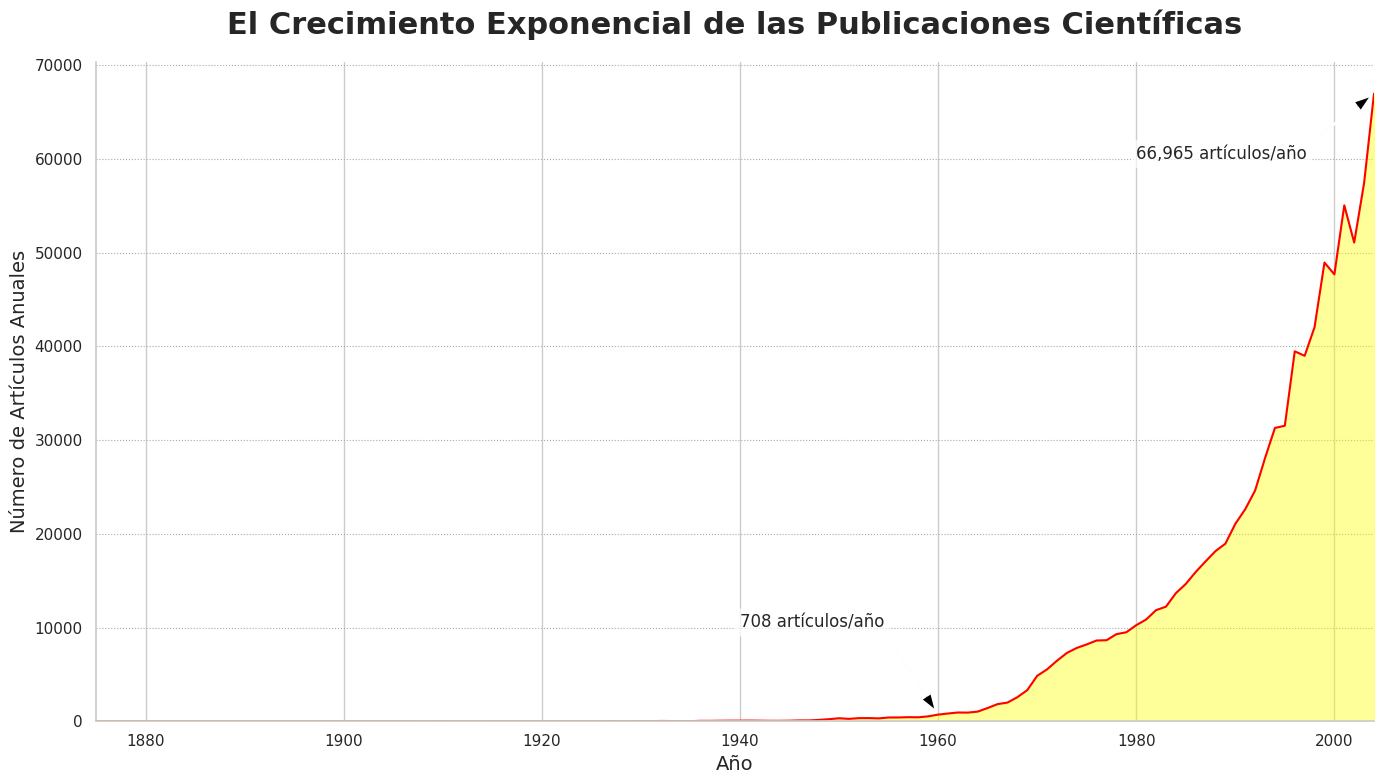

In [9]:
# --- GRÁFICO MEJORADO Y ESTILIZADO PARA PRESENTACIÓN ---
print("\n📈 Generando Gráfico Mejorado para Presentación...")

# Se asume que los dataframes ya están cargados
# Preparar datos (solo necesitamos el año de una de las tablas)
df_mathbert['year'] = pd.to_datetime(df_mathbert['cover_date']).dt.year

# Calcular el conteo de artículos por año
counts_per_year = df_mathbert.groupby('year')['eid'].count()

# --- Configuración del tema y la figura ---
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))

# --- Título y etiquetas ---
ax.set_title('El Crecimiento Exponencial de las Publicaciones Científicas', fontsize=22, weight='bold', pad=20)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Número de Artículos Anuales', fontsize=14)

# --- Gráfico de área con línea de borde superior ---

# 1. Dibuja el área de relleno con un color y transparencia
ax.fill_between(counts_per_year.index, counts_per_year.values,
                color='yellow', # El color de relleno que querías
                alpha=0.4,      # Transparencia
                label='_nolegend_') # Etiqueta especial para que no aparezca en la leyenda

# 2. Dibuja la línea del borde superior encima del área
ax.plot(counts_per_year.index, counts_per_year.values,
        color='red',    # El color de la línea que querías
        lw=1.5,         # Grosor de la línea
        label='Nº Artículos/Año')

# --- Anotaciones Clave con mejor legibilidad ---
# Texto con el total del corpus
"""
total_articulos = df_mathbert['eid'].nunique()
ax.text(1945, 50000, f'Corpus Total:\n> {total_articulos/1e6:.1f} Millones de Artículos',
        ha='center', fontsize=16, weight='bold', color='black',
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7, ec='none'))
"""
# Anotación para un año temprano
ax.annotate(f'{counts_per_year.loc[1960]:,} artículos/año',
            xy=(1960, counts_per_year.loc[1960]), xytext=(1940, 10000),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
            fontsize=12, bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7, ec='none'))

# Anotación para un año tardío
ax.annotate(f'{counts_per_year.loc[2004]:,} artículos/año',
            xy=(2004, counts_per_year.loc[2004]), xytext=(1980, 60000),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
            fontsize=12, bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7, ec='none'))

# --- Estética final más limpia ---
ax.grid(True, which='major', axis='y', linestyle=':', linewidth=0.8, color='darkgray')
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlim(counts_per_year.index.min(), counts_per_year.index.max())
ax.set_ylim(0)
fig.tight_layout()

# --- Guardar la figura con ALTA RESOLUCIÓN ---
ruta_guardado_presentacion = os.path.join(TMP_IMG, '07_volumen_publicaciones_presentacion_mejorado.png')
plt.savefig(ruta_guardado_presentacion, dpi=300, bbox_inches='tight')
print(f"✅ Gráfico mejorado para presentación guardado en: {ruta_guardado_presentacion}")
plt.show()

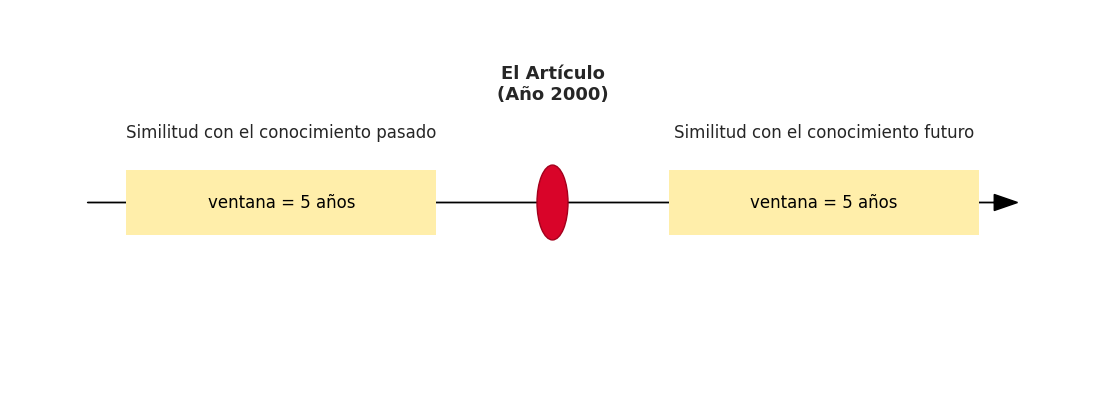

In [22]:
# --- 1. Configuración del Gráfico ---
fig, ax = plt.subplots(figsize=(14, 5))

# --- 2. Dibujar la Línea de Tiempo (Flecha) ---
ax.arrow(-6, 0, 12, 0, head_width=0.15, head_length=0.3, fc='black', ec='black', length_includes_head=True)

# --- 3. Dibujar los Rectángulos de Conocimiento ---
rect_pasado = patches.Rectangle((-5.5, -0.3), 4, 0.6, linewidth=0, facecolor='#FFEEAA')
ax.add_patch(rect_pasado)

rect_futuro = patches.Rectangle((1.5, -0.3), 4, 0.6, linewidth=0, facecolor='#FFEEAA')
ax.add_patch(rect_futuro)

# --- 4. Añadir el Punto Focal (El Artículo) ---
focal_point = patches.Ellipse((0, 0), 0.4, 0.7, facecolor='#d90429', ec='#a4001c')
ax.add_patch(focal_point)

# --- 5. Añadir todo el Texto ---
ax.text(0, 1.1, 'El Artículo\n(Año 2000)', ha='center', va='center', fontsize=13, fontweight='bold')

ax.text(-3.5, 0.65, 'Similitud con el conocimiento pasado', ha='center', va='center', fontsize=12)
ax.text(3.5, 0.65, 'Similitud con el conocimiento futuro', ha='center', va='center', fontsize=12)

# --- NUEVO: Texto dentro de los rectángulos ---
ax.text(-3.5, 0, 'ventana = 5 años', ha='center', va='center', fontsize=12, color='black')
ax.text(3.5, 0, 'ventana = 5 años', ha='center', va='center', fontsize=12, color='black')

# --- 6. Limpieza y Ajustes Finales ---
ax.set_xlim(-7, 7)
ax.set_ylim(-1.8, 1.8)
ax.axis('off')

# --- 7. Guardar la Imagen en Alta Resolución ---
ruta_guardado_presentacion = os.path.join(TMP_IMG, '08_Indice_KI.png')
plt.savefig(ruta_guardado_presentacion, dpi=300, bbox_inches='tight')

# --- 8. Mostrar la Imagen ---
plt.show()